# MNIST Handwritten Digit Classification

<img src="Images/intro.png" width="600" height="200">

**Problem Statement**

Here, we need to identify the digit in given images. We have total 70,000 images, out of which 49,000 are part of train images with the label of digit and rest 21,000 images are unlabeled (known as test images). Now, We need to identify the digit for test images. Public and Private split for test images are 40:60 and evaluation metric of this challenge is accuracy. 

**About the data**

The MNIST dataset is an acronym that stands for the Modified National Institute of Standards and Technology datase.

It is a dataset of 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9.

<img src="Images/digits_separate.png" width="800" height="400">


The task is to classify a given image of a handwritten digit into one of 10 classes representing integer values from 0 to 9, inclusively.

Since each image has 28 by 28 pixels, we get a 28x28 array. We can flatten each array into a 28x28=784
dimensional vector. Each component of the vector is a value between zero and one describing the intensity of the pixel (The input pixels are greyscale, with a value of 0.0 representing white, a value of 1.0 representing black, and in between values representing gradually darkening shades of grey). Thus, we generally think of MNIST as being a collection of 784-dimensional vectors.

Not all vectors in this 784-dimensional space are MNIST digits. Typical points in this space are very different! To get a sense of what a typical point looks like, we can randomly pick a few points and examine them. In a random point – a random 28x28 image – each pixel is randomly black, white or some shade of gray. 



It is a widely used and deeply understood dataset and, for the most part, is “solved.” Top-performing models are deep learning convolutional neural networks that achieve a classification accuracy of above 99%, with an error rate between 0.4 %and 0.2% on the hold out test dataset.

# The Model

## Why convlutional neural networks?

The main structural feature of RegularNets is that all the neurons are connected to each other. For example, when we have images with 28 by 28 pixels with only greyscale, we will end up having 784 (28 x 28 x 1) neurons in a layer which seems manageable. However, most images have way more pixels and they are not grey-scaled. Therefore, assuming that we have a set of color images in 4K Ultra HD, we will have 26,542,080 (4096 x 2160 x 3) different neurons connected to each other in the first layer which is not really manageable. Therefore, we can say that RegularNets are not scalable for image classification. However, especially when it comes to images, there seems to be little correlation or relation between two individual pixels unless they are close to each other. This leads to the idea of Convolutional Layers and Pooling Layers.

## About the layers 

### Convolutional layers

Convolutional layer is the very first layer where we extract features from the images in our datasets. Due to the fact that pixels are only related with the adjacent and close pixels, convolution allows us to preserve the relationship between different parts of an image. Convolution is basically filtering the image with a smaller pixel filter to decrease the size of the image without loosing the relationship between pixels. When we apply convolution to 5x5 image by using a 3x3 filter with 1x1 stride (1 pixel shift at each step). We will end up having a 3x3 output (64% decrease in complexity).

<img src="Images/ActivationMap.png" width="600" height="200">

For explanatory purposes, we initialize a 3x3 filter with ran values between 0 and 1. Then the first convulotional layer will be the dot product of the matrices from the input neuron (our image) and the filter. 

### Max Pooling

When constructing CNNs, it is common to insert pooling layers after each convolution layer to reduce the spatial size of the representation to reduce the parameter counts which reduces the computational complexity. In addition, pooling layers also helps with the overfitting problem. Basically we select a pooling size to reduce the amount of the parameters by selecting the maximum, average, or sum values inside these pixels. Max Pooling, one of the most common pooling techniques, may be demonstrated as follows:

<img src="Images/pooling.png" width="400" height="100">

## Fully connected layer

Since our time-space complexity is vastly reduced thanks to convolution and pooling layers, we can construct a fully connected network in the end to classify our images.

 <img src="Images/fullconnected.jpeg" width="900" height="500">


**Import libraries**

In [117]:
from keras.datasets import mnist
import numpy as np
from matplotlib import pyplot
from keras.utils.np_utils import to_categorical
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

## Loading the dataset

We know that the images are all pre-aligned (e.g. each image only contains a hand-drawn digit), that the images all have the same square size of 28×28 pixels, and that the images are grayscale.

Therefore, we can load the images and reshape the data arrays to have a single color channel

In [92]:
(trainX, trainY), (testX, testY) = mnist.load_data()

In [93]:
print('Train: X=%s, y=%s' % (trainX.shape, trainY.shape))
print('Test: X=%s, y=%s' % (testX.shape, testY.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


## Quick look at some images

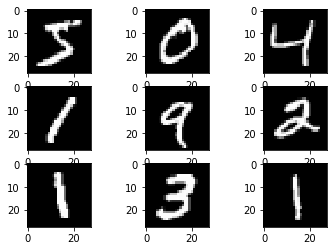

In [79]:
for i in range(9):
# define subplot
    pyplot.subplot(330 + 1 + i)
# plot raw pixel data
    pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

# Data Preprocessing and Preparation

### Reshaping the data

We know that the images are all pre-aligned (e.g. each image only contains a hand-drawn digit), that the images all have the same square size of 28×28 pixels, and that the images are grayscale.
Therefore, we can load the images and reshape the data arrays to have a single color channel.

 <img src="Images/numpy_array.png" width="400" height="300">
 
 
Keras Conv2D layer performs the convolution operation. It requires its input to be a 4-dimensional array. We have to reshape the input to ( , 1, 28, 28) or possibly to ( , 28, 28, 1), depending on your setup and backend (theano or tensorlow image layout convention).

How would we store 60k images 28 by 28 pixels if it was RGB? For each pixel you would need 3 scalars (each for one channel), so it would be 60000x28x28x3.

And how many channels you need when the image is in greyscale (in our case)? Just one, so it would be 60000x28x28x1.

In [94]:
# reshape dataset to have a single channel
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

In [95]:
#trainX.shape[0] = 60 000
trainX.shape

(60000, 28, 28, 1)

### Hot one encoding

We also know that there are 10 classes and that classes are represented as unique integers (0 to 9).

We can, therefore, use a one hot encoding for the class element of each sample, transforming the integer into a 10 element binary vector with a 1 for the index of the class value, and 0 values for all other classes.

<img src="Images/one-hot.png" width="400" height="300">

We can achieve this with the to_categorical() utility function.

In [96]:
# one hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)

**Function that reshapes and hot-one encodes**

### Prepare Pixel Data

We know that the pixel values for each image in the dataset are unsigned integers in the range between **black and white**, or **0 and 255.**

<img src="Images/pixels.jpeg" width="800" height="500">

We do not know the best way to scale the pixel values for modeling, but we know that some scaling will be required.

A good starting point is to normalize the pixel values of grayscale images, e.g. rescale them to the range **[0,1]**. This involves first converting the data type from unsigned integers to floats, then dividing the pixel values by the maximum value (255).

In [97]:
trainX = trainX.astype('float32') / 255 

testX = testX.astype('float32') / 255

# Implementing the Model

Next, we need to define a baseline convolutional neural network model for the problem.

The model has two main aspects: 

1) Feature extraction front end comprised of convolutional and pooling layers

2) Classifier backend that will make a prediction.

For the convolutional front-end, we can start with a single convolutional layer with a small **filter size (3,3)** and a modest number of **filters (32)** followed by a max pooling layer. The filter maps can then be flattened to provide features to the classifier.

Given that the problem is a multi-class classification task, we know that we will require an output layer with **10 nodes** in order to predict the probability distribution of an image belonging to each of the 10 classes. This will also require the use of a softmax activation function. Between the feature extractor and the output layer, we can add a dense layer to interpret the features, in this case with 100 nodes.

All layers will use the **ReLU activation function** and the **weight initialization scheme**, both best practices. The aim of weight initialization is to prevent layer activation outputs from exploding or vanishing during the course of a forward pass through a deep neural network.

We will use a conservative configuration for the **stochastic gradient descent optimizer** with a learning rate of 0.01 and a momentum of 0.9. The **categorical cross-entropy loss function** will be optimized, suitable for multi-class classification, and we will monitor the **classification accuracy metric**, which is appropriate given we have the same number of examples in each of the 10 classes.

## ReLu activation function

The ReLU function is another non-linear activation function that has gained popularity in the deep learning domain. ReLU stands for **Rectified Linear Unit**. The main advantage of using the ReLU function over other activation functions is that it does not activate all the neurons at the same time.

This means that the neurons will only be deactivated if the output of the linear transformation is less than 0. The plot below will help you understand this better-

<img src="Images/relu.png" width="600" height="300">


ReLU is the most commonly used activation function in neural networks, especially in CNNs. If you are unsure what activation function to use in your network, ReLU is usually a good first choice.

## Stochastic Gradient Descent

Stochastic gradient descent is a method to find the optimal parameter configuration for a machine learning algorithm. It iteratively makes small adjustments to a machine learning network configuration to decrease the error of the network. 
 

Error functions are rarely as simple as a typical parabola. Most often they have lots of hills and valleys, like the function pictured here. In this graph, if true gradient descent started on the left side of the graph, it would stop at the left valley because no matter which direction you travel from this point, you must travel upwards. This point is known as a local minimum. However, there exists another point in the graph that is lower. The lowest point in the entire graph is the global minimum, which is what stochastic gradient descent attempts to find. 


<img src="Images/stochastic-gradient-descent.jpg" width="600" height="300">

Stochastic gradient descent attempts to find the global minimum by adjusting the configuration of the network after each training point. Instead of decreasing the error, or finding the gradient,  for the entire data set, this method merely decreases the error by approximating the gradient for a randomly selected batch (which may be as small as single training sample).  In practice, the random selection is achieved by randomly shuffling the dataset and working through batches in a stepwise fashion.

Heuristically,  if the network gets a training example wrong, it will update the configuration in favor of getting it right in the future. However, the configuration update might come at the cost of getting other questions wrong, thus increasing the overall error of the network. Thus not every training iteration may improve the network through the stochastic gradient descent algorithm.
 
On the other hand, stochastic gradient descent can adjust the network parameters in such a way as to move the model out of a local minimum and toward a global minimum. Looking back to the concave function pictured above, after processing a training example, the algorithm may choose to move to the right on the graph in order to get out of the local minimum we were in. Even though doing so increases the error of the network, it allows it to move over the hill. This will allow further training to cause the gradient descent to move toward the global minimum. 
 
A benefit of stochastic gradient descent is that it requires much less computation than true gradient descent (and is therefore faster to calculate), while still generally converging to a minimum (although not necessarily a global one). 


## Learning rate

In simple words learning rate determines how fast weights (in case of a neural network) or the cooefficents (in case of linear regression or logistic regression) change.

If c is a cost function with variables (or weights) w1,w2….wn then,

Lets take stochastic gradient descent where we change weights sample by sample -

For every sample: w1new= w1 + (learning rate)* (derivative of cost function wrt w1

<img src="Images/learning_rate.png" width="400" height="200">

If learning rate is too high derivative may miss the 0 slope point or learning rate is too low then it may take forever to reach that point. So we need to figure out that balanced learning rate.

<img src="Images/learning_rate2.png" width="800" height="400">

## Momentum

In neural networks, we use gradient descent optimization algorithm to minimize the error function to reach a global minima. In an ideal world the error function would look like this

<img src="Images/momentum.gif" width="200" height="100">

So you are guaranteed to find the global optimum because there are no local minimum where your optimization can get stuck. However in real the error surface is more complex, may comprise of several local minima and may look like this

<img src="Images/momentum2.gif" width="200" height="100">

In this case, you can easily get stuck in a local minima and the algorithm may think you reach the global minima leading to sub-optimal results. To avoid this situation, we use a momentum term in the objective function, which is a value between 0 and 1 that increases the size of the steps taken towards the minimum by trying to jump from a local minima. If the momentum term is large then the learning rate should be kept smaller. A large value of momentum also means that the convergence will happen fast. But if both the momentum and learning rate are kept at large values, then you might skip the minimum with a huge step. A small value of momentum cannot reliably avoid local minima, and can also slow down the training of the system. Momentum also helps in smoothing out the variations, if the gradient keeps changing direction. A right value of momentum can be either learned by hit and trial or through cross-validation.




## Accuracy metric

Accuracy is one metric for evaluating classification models. Informally, accuracy is the fraction of predictions our model got right.

<img src="Images/confusion_m.jpg" width="600" height="200">



## Finally let's do some code

In [98]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

Compile the model

In [99]:
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

Initialise the parameters

In [105]:
batch_size = 128
num_classes = 10
epochs = 12

Run the model and evaluate the accuracy

In [106]:
results = model.fit(trainX, trainY,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(testX, testY))

score = model.evaluate(testX, testY, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 16s 271us/step - loss: 0.0960 - accuracy: 0.9726 - val_loss: 0.0814 - val_accuracy: 0.9755
Epoch 2/12
60000/60000 [==============================] - 17s 289us/step - loss: 0.0659 - accuracy: 0.9814 - val_loss: 0.0607 - val_accuracy: 0.9808
Epoch 3/12
60000/60000 [==============================] - 17s 291us/step - loss: 0.0510 - accuracy: 0.9855 - val_loss: 0.0583 - val_accuracy: 0.9811
Epoch 4/12
60000/60000 [==============================] - 18s 292us/step - loss: 0.0405 - accuracy: 0.9884 - val_loss: 0.0453 - val_accuracy: 0.9854
Epoch 5/12
60000/60000 [==============================] - 18s 295us/step - loss: 0.0350 - accuracy: 0.9901 - val_loss: 0.0457 - val_accuracy: 0.9840
Epoch 6/12
60000/60000 [==============================] - 18s 297us/step - loss: 0.0286 - accuracy: 0.9923 - val_loss: 0.0463 - val_accuracy: 0.9830
Epoch 7/12
60000/60000 [==============================] 

In [104]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 5408)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 100)               540900    
_________________________________________________________________
dense_22 (Dense)             (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________


## Explaining some of the code/terminology


### model = Sequential()

When to use a Sequential model:

A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

A Sequential model is **not appropriate** when:

    - Your model has multiple inputs or multiple outputs
    - Any of your layers has multiple inputs or multiple outputs
    - You need to do layer sharing
    - You want non-linear topology (e.g. a residual connection, a multi-branch model)
    
You can also simply add layers via the .add() method

### kernel_intializer

Initializers define the way to set the initial random weights of Keras layers.

The keyword arguments used for passing initializers to layers depends on the layer. Usually, it is simply kernel_initializer and bias_initializer.

The neural network needs to start with some weights and then iteratively update them to better values. The term kernel_initializer is a fancy term for which statistical distribution or function to use for initialising the weights. In case of statistical distribut

### Flatten

<img src="Images/flatten.png" width="600" height="200">

### Dense

Dense implements the operation: output = activation(dot(input, kernel) + bias) where activation is the element-wise activation function passed as the activation argument, kernel is a weights matrix created by the layer, and bias is a bias vector created by the layer (only applicable if use_bias is True).

### Batch size

The batch size defines the number of samples that will be propagated through the network.

For instance, let's say you have 1050 training samples and you want to set up a batch_size equal to 100. The algorithm takes the first 100 samples (from 1st to 100th) from the training dataset and trains the network. Next, it takes the second 100 samples (from 101st to 200th) and trains the network again. We can keep doing this procedure until we have propagated all samples through of the network. Problem might happen with the last set of samples. In our example, we've used 1050 which is not divisible by 100 without remainder. The simplest solution is just to get the final 50 samples and train the network.

### Epoch

This comes in the context of training a neural network with gradient descent. Since we usually train NNs using stochastic or mini-batch gradient descent, not all training data is used at each iterative step.

Stochastic and mini-batch gradient descent use a batch_size number of training examples at each iteration, so at some point you will have used all data to train and can start over from the beginning of the dataset.

Considering that, one epoch is one complete pass through the whole training set, means it is multiple iterations of gradient descent updates until you show all the data to the NN, and then start again.



# Predicitons

In [110]:
preds = model.predict(testX)

Let's check the first image in the test set

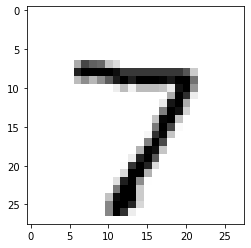

In [114]:
#Reload the data so that imshow can understand the input
(_, _), (test_images, _) = mnist.load_data()

pyplot.imshow(test_images[0], cmap=pyplot.cm.binary)

So the first image in the test set is the number **7**

Since the output of the network was a layer with 10 units and a softmax activation, we will get an array of length 10 with a prediction for each potential number.

In [115]:
print(preds[0])

[7.6656032e-10 2.1291169e-09 3.6747838e-07 2.1852575e-06 1.5035985e-11
 1.5566966e-10 6.1807032e-14 9.9999750e-01 2.2503048e-10 3.3695716e-08]


We can also find the class with the highest prediction score with a numpy function:

In [118]:
np.argmax(preds[0])

7

### Evaluating the model with K-fold

After the model is defined, we need to evaluate it.

The model will be evaluated using five-fold cross-validation. The value of k=5 was chosen to provide a baseline for both repeated evaluation and to not be so large as to require a long running time. Each test set will be 20% of the training dataset, or about 12,000 examples, close to the size of the actual test set for this problem.

The training dataset is shuffled prior to being split, and the sample shuffling is performed each time, so that any model we evaluate will have the same train and test datasets in each fold, providing an apples-to-apples comparison between models.

<img src="Images/kfolds.png" width="600" height="200">

We will train the baseline model for a modest 10 training epochs with a default batch size of 32 examples. The test set for each fold will be used to evaluate the model both during each epoch of the training run, so that we can later create learning curves, and at the end of the run, so that we can estimate the performance of the model. As such, we will keep track of the resulting history from each run, as well as the classification accuracy of the fold.




### Good resources

**MNIST Data explained**

https://colah.github.io/posts/2014-10-Visualizing-MNIST/ + https://www.youtube.com/watch?v=5gLarqG8p4s


**MNIST Tutorial**

https://wtfleming.github.io/2019/04/21/keras-mnist/

https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/

https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d

**About CNN**

https://www.youtube.com/watch?v=YRhxdVk_sIs

https://adeshpande3.github.io/A-Beginner%27s-Guide-To-Understanding-Convolutional-Neural-Networks/

**Max pooling**

https://machinelearningmastery.com/pooling-layers-for-convolutional-neural-networks/

https://www.youtube.com/watch?v=YRhxdVk_sIs


**ReLu activation function**

https://deepai.org/machine-learning-glossary-and-terms/relu


https://www.youtube.com/watch?v=Xehr9TBeJv4


**Weight initilization**

 https://www.youtube.com/watch?v=YRhxdVk_sIs
 
 **Stochastic Gradient Descent**
 
 https://www.youtube.com/watch?v=vMh0zPT0tLI&vl=en
 
 https://deepai.org/machine-learning-glossary-and-terms/stochastic-gradient-descent
 
 **Momentum** 
 
https://www.willamette.edu/~gorr/classes/cs449/momrate.html

https://www.quora.com/What-does-momentum-mean-in-neural-networks

**Flatten**

https://stackoverflow.com/questions/43237124/what-is-the-role-of-flatten-in-keras
    